Read files

In [537]:
import numpy as np
import random
import time

def read_vrp_file(filepath: str):
    data = {
        "name": None,
        "dimension": None,
        "capacity": None,
        "customers": {},   # now contains x,y,demand
        "depot": None,
        "distance_matrix": None
    }

    coordinates = {}
    demands = {}

    section = None
    with open(filepath, "r") as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("EOF"):
                continue

            # Metadata
            if line.startswith("NAME"):
                data["name"] = line.split(":")[1].strip()
            elif line.startswith("DIMENSION"):
                data["dimension"] = int(line.split(":")[1].strip())
            elif line.startswith("CAPACITY"):
                data["capacity"] = int(line.split(":")[1].strip())
            elif line.startswith("EDGE_WEIGHT_TYPE"):
                data["edge_weight_type"] = line.split(":")[1].strip()

            # Sections
            elif line.startswith("NODE_COORD_SECTION"):
                section = "coords"
                continue
            elif line.startswith("DEMAND_SECTION"):
                section = "demand"
                continue
            elif line.startswith("DEPOT_SECTION"):
                section = "depot"
                continue

            # Parse sections
            elif section == "coords":
                parts = line.split()
                node, x, y = int(parts[0]), float(parts[1]), float(parts[2])
                coordinates[node] = (x, y)

            elif section == "demand":
                parts = line.split()
                node, demand = int(parts[0]), int(parts[1])
                demands[node] = demand

            elif section == "depot":
                node = int(line)
                if node == -1:  # End of depot section
                    section = None
                else:
                    data["depot"] = node

    # Merge coordinates and demands into customers
    for node, (x, y) in coordinates.items():
        demand = demands.get(node, 0)
        data["customers"][node] = (x, y, demand)

    return data


data = read_vrp_file("content/X-n125-k30.vrp")
vehicle_count = 30
data['customers']



{1: (989.0, 944.0, 0),
 2: (5.0, 730.0, 32),
 3: (769.0, 200.0, 7),
 4: (698.0, 515.0, 83),
 5: (72.0, 561.0, 30),
 6: (52.0, 397.0, 62),
 7: (771.0, 177.0, 26),
 8: (81.0, 537.0, 31),
 9: (43.0, 371.0, 75),
 10: (716.0, 202.0, 5),
 11: (106.0, 406.0, 85),
 12: (627.0, 172.0, 15),
 13: (10.0, 338.0, 94),
 14: (776.0, 432.0, 16),
 15: (761.0, 469.0, 38),
 16: (759.0, 287.0, 32),
 17: (593.0, 363.0, 5),
 18: (773.0, 290.0, 17),
 19: (129.0, 398.0, 92),
 20: (709.0, 193.0, 50),
 21: (99.0, 564.0, 16),
 22: (163.0, 418.0, 79),
 23: (48.0, 619.0, 11),
 24: (907.0, 406.0, 33),
 25: (929.0, 527.0, 60),
 26: (69.0, 672.0, 11),
 27: (675.0, 960.0, 96),
 28: (50.0, 763.0, 46),
 29: (736.0, 240.0, 48),
 30: (46.0, 518.0, 31),
 31: (128.0, 793.0, 25),
 32: (699.0, 581.0, 96),
 33: (58.0, 398.0, 71),
 34: (43.0, 393.0, 61),
 35: (783.0, 186.0, 3),
 36: (58.0, 360.0, 100),
 37: (45.0, 712.0, 6),
 38: (38.0, 393.0, 94),
 39: (652.0, 524.0, 88),
 40: (37.0, 364.0, 53),
 41: (37.0, 617.0, 19),
 42: (61

Creates individuals

In [538]:
customers = [cust for key, cust in data['customers'].items()]
print(customers)
vehicleCapacity = data['capacity']
depot = data['depot']-1

# hardcoding vehicles, not good we need change

def vehicleCheck(vehicle, customer=None):
  usedSpace = 0
  for cust in vehicle:
    usedSpace += customers[cust][2]
  if customer is not None:
    return usedSpace + customer[2] <= vehicleCapacity
  else:
    return usedSpace <= vehicleCapacity

def create_individual():
    # Step 2: Remove one random element
    individual = [[] for _ in range(vehicle_count)]

    for idx in range(1,len(customers)):
        customer = customers[idx]
        chosen_vehicle = random.randint(0, vehicle_count - 1)
        if vehicleCheck(individual[chosen_vehicle],customer):
            individual[chosen_vehicle].append(idx)
        else:
            individual.append([idx])

    return individual

create_individual()

[(989.0, 944.0, 0), (5.0, 730.0, 32), (769.0, 200.0, 7), (698.0, 515.0, 83), (72.0, 561.0, 30), (52.0, 397.0, 62), (771.0, 177.0, 26), (81.0, 537.0, 31), (43.0, 371.0, 75), (716.0, 202.0, 5), (106.0, 406.0, 85), (627.0, 172.0, 15), (10.0, 338.0, 94), (776.0, 432.0, 16), (761.0, 469.0, 38), (759.0, 287.0, 32), (593.0, 363.0, 5), (773.0, 290.0, 17), (129.0, 398.0, 92), (709.0, 193.0, 50), (99.0, 564.0, 16), (163.0, 418.0, 79), (48.0, 619.0, 11), (907.0, 406.0, 33), (929.0, 527.0, 60), (69.0, 672.0, 11), (675.0, 960.0, 96), (50.0, 763.0, 46), (736.0, 240.0, 48), (46.0, 518.0, 31), (128.0, 793.0, 25), (699.0, 581.0, 96), (58.0, 398.0, 71), (43.0, 393.0, 61), (783.0, 186.0, 3), (58.0, 360.0, 100), (45.0, 712.0, 6), (38.0, 393.0, 94), (652.0, 524.0, 88), (37.0, 364.0, 53), (37.0, 617.0, 19), (61.0, 534.0, 50), (664.0, 358.0, 19), (555.0, 445.0, 39), (712.0, 465.0, 21), (38.0, 469.0, 95), (2.0, 729.0, 7), (65.0, 620.0, 40), (156.0, 497.0, 51), (857.0, 475.0, 16), (773.0, 234.0, 47), (879.0, 9

[[29, 83, 87],
 [7, 30, 102],
 [5, 22, 48],
 [17, 20, 31, 85],
 [43, 82, 115],
 [18, 19, 47],
 [13, 46, 104, 111],
 [58, 90],
 [34, 59, 100],
 [6, 32, 61, 79],
 [9, 15, 57, 97],
 [26, 109, 124],
 [92],
 [3, 42, 63, 80],
 [64, 75, 76, 77, 108],
 [21, 37],
 [55, 56, 66],
 [70, 103],
 [4, 50, 60, 74],
 [38, 71, 78, 84],
 [33, 39, 53],
 [40, 41, 45, 95],
 [2, 14, 24, 62],
 [11, 16, 35, 36],
 [25, 27, 54, 68],
 [49, 89, 118, 123],
 [51, 99, 117],
 [1],
 [8, 28, 44, 67],
 [10, 12],
 [23],
 [52],
 [65],
 [69],
 [72],
 [73],
 [81],
 [86],
 [88],
 [91],
 [93],
 [94],
 [96],
 [98],
 [101],
 [105],
 [106],
 [107],
 [110],
 [112],
 [113],
 [114],
 [116],
 [119],
 [120],
 [121],
 [122]]

In [539]:
# Euclidean distance between two customers
def euclidean_distance(cust1, cust2):
    x1, y1 = cust1[0], cust1[1]
    x2, y2 = cust2[0], cust2[1]
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5

# Create distance matrix
def create_distance_matrix():
    n = len(customers)
    distance_matrix = np.zeros((n, n))  # n x n matrix

    for i in range(len(customers)):
        for j in range(len(customers)):
            distance_matrix[i][j] = euclidean_distance(customers[i], customers[j])
    # print(customers)
    # print(distance_matrix)
    return distance_matrix


def distance_per_route(route):
  depot_route = [depot] + route + [depot]
  distance = 0

  for customeridx in range(len(depot_route)-1):
    # print(depot_route[customeridx],depot_route[customeridx+1])
    distance+=distance_matrix[depot_route[customeridx]][depot_route[customeridx+1]]

  return distance

# Example usage
distance_matrix = create_distance_matrix()

individuals = create_individual()

print(distance_per_route(individuals[0]))

2239.8198605550606


In [540]:
def totalDistance(solution):
  total_distance = 0
  for route in solution:
    total_distance += distance_per_route(route)
  return total_distance

In [541]:
def standardDeviation(solution):
  total_distance = totalDistance(solution)
  num_vehicles = len(solution)
  average_distance = total_distance/num_vehicles
  sum = 0
  for route in solution:
    distance = distance_per_route(route)
    sum += (distance-average_distance)**2

  return (sum*1/num_vehicles)**0.5


In [542]:
fitness_total_distance = totalDistance(individuals)
print(fitness_total_distance)
fitness_standard_dev = standardDeviation(individuals)
print(fitness_standard_dev)

125000.21754537159
814.8602293148709


Mutation

In [543]:
def swap_mutation(individual):
    candidates = [v for v in individual if len(v) >= 2]
    if not candidates:
        # Nothing to swap, return the individual as-is
        return individual
    
    vehicle = random.choice(candidates)
    i, j = random.sample(range(len(vehicle)), 2)
    vehicle[i], vehicle[j] = vehicle[j], vehicle[i]
    return individual


def relocation_mutation(individual):
    # pick a non-empty vehicle as source
    from_vehicle = random.choice([v for v in individual if v])
    customer = from_vehicle.pop(random.randrange(len(from_vehicle)))

    # pick a different vehicle as target
    candidates = [v for v in individual if v is not from_vehicle]
    to_vehicle = random.choice(candidates)

    # Check if car has space for customer
    if vehicleCheck(to_vehicle,customers[customer]):
        # insert at random position
        insert_pos = random.randint(0, len(to_vehicle))
        to_vehicle.insert(insert_pos, customer)
    # If there isnt space in the car, create new one
    else:
        individual.append([customer])

    return individual

In [544]:
testIndividual = create_individual()
print(testIndividual)
newIndividual = relocation_mutation(testIndividual)
print(newIndividual)

[[], [15, 34, 48, 50], [18, 24], [], [66, 103], [17, 62, 93], [4, 37, 76], [14, 84], [9, 29, 60, 81, 104], [2, 90, 119, 121], [5, 21, 64, 74, 118], [3, 52, 65, 101], [8, 27, 77], [63, 83, 97], [1, 10, 105], [38, 40, 47, 49, 51, 54], [22, 26, 72], [7, 45, 53], [6, 23, 32, 79, 80], [13, 16], [11, 36, 55], [12, 73], [42, 111], [], [25, 67, 82, 85, 109], [19, 39, 59, 78, 117, 123], [43, 71, 88], [44, 70, 92, 102], [20, 28, 31], [30, 46, 58, 68, 69], [33], [35], [41], [56], [57], [61], [75], [86], [87], [89], [91], [94], [95], [96], [98], [99], [100], [106], [107], [108], [110], [112], [113], [114], [115], [116], [120], [122], [124]]
[[], [15, 34, 48, 50], [18, 24], [], [66, 73, 103], [17, 62, 93], [4, 37, 76], [14, 84], [9, 29, 60, 81, 104], [2, 90, 119, 121], [5, 21, 64, 74, 118], [3, 52, 65, 101], [8, 27, 77], [63, 83, 97], [1, 10, 105], [38, 40, 47, 49, 51, 54], [22, 26, 72], [7, 45, 53], [6, 23, 32, 79, 80], [13, 16], [11, 36, 55], [12], [42, 111], [], [25, 67, 82, 85, 109], [19, 39, 5

In [545]:
def order_crossover(parent1, parent2):
    number_of_customers = sum(len(r) for r in parent1)

    # 1. Create lists without vehicle format from parents
    parent1_to_list = [c for route in parent1 for c in route]
    parent2_to_list = [c for route in parent2 for c in route]

    # 2. Pick random crossover points and add to child
    start, end = sorted(random.sample(range(len(parent1_to_list)), 2))
    child_list = [None]*number_of_customers
    child_list[start:end+1] = parent1_to_list[start:end+1]

    # 3. Fill remaining customers from parent2 in order
    pointer = (end + 1) % len(child_list)
    for c in parent2_to_list:
        if c not in child_list:
            child_list[pointer] = c
            pointer = (pointer + 1) % len(child_list)

    # 4. Split child list into vehicle routes based on parent1 format
    child = []

    index_parent_vehicle_length = 0
    index_child_vehicle_length = 0
    counter = 0
    child.append([])
    for customer in child_list:

        if counter >= len(parent1[index_parent_vehicle_length]):
          index_parent_vehicle_length+=1
          index_child_vehicle_length+=1
          child.append([])
          counter = 0
        elif not vehicleCheck(child[index_child_vehicle_length],customers[customer]):
          index_child_vehicle_length+=1
          child.append([])

        counter+=1
        child[index_child_vehicle_length].append(customer)

    # print("Output:")
    return child

In [546]:
import numpy as np

def spread_delta(points, sort_by=0):
    """
    Spread (Δ) for 2-objective minimization (NSGA-II).
    points: (N,2) array of non-dominated points.
    """
    
    # Normalize objectives for distance-based metrics
    unique_front_objs = np.unique(points, axis=0)

    mins = unique_front_objs.min(axis=0)
    maxs = unique_front_objs.max(axis=0)
    diff  = np.where(maxs > mins, maxs - mins, 1.0)   # avoid divide-by-zero
    normalized_front_objs = (unique_front_objs - mins) / diff

    # sort along one objective to walk the front
    normalized_front_objs = normalized_front_objs[np.argsort(normalized_front_objs[:, sort_by])]

    diffs = np.linalg.norm(normalized_front_objs[1:] - normalized_front_objs[:-1], axis=1)
    
    mean_diff = float(np.mean(diffs)) if len(diffs) else 0.0

    numerator = float(np.sum(np.abs(diffs - mean_diff)))
    denominator = (len(normalized_front_objs) - 1) * mean_diff
    return (numerator / denominator) if denominator != 0.0 else 0.0


In [547]:
def hypervolume(population):
    pop = np.array([p.objectives for p in population], dtype=float)
    pareto_front = np.array([p.objectives for p in population if p.rank == 1], dtype=float)

    # Remove duplicates
    unique_pop = np.unique(pop, axis=0)
    unique_front = np.unique(pareto_front, axis=0)

    # Normalize to [0,1]
    mins = unique_pop.min(axis=0)
    maxs = unique_pop.max(axis=0)
    diff = np.where(maxs > mins, maxs - mins, 1.0)
    normalized_front = (unique_front - mins) / diff

    # Reference at [1,1]
    ref_point = np.array([1.0, 1.0])

    # Sort front by first objective
    normalized_front = normalized_front[np.argsort(normalized_front[:, 0])]

    hv = 0.0
    prev_f1 = ref_point[0]

    for f1, f2 in normalized_front[::-1]:  # iterate worst to best f1
        width = prev_f1 - f1
        height = ref_point[1] - f2
        hv += width * height
        prev_f1 = f1

    return hv




In [ ]:
# NSGA-II core: selection, sorting, crowding distance, crossover, mutation, main loop
import numpy as np
import random
from typing import List, Tuple

class NSGA2:
    """
    Represents a solution in the NSGA-II algorithm.
    """
    def __init__(self, x: np.ndarray):
        self.x = x
        self.objectives = None
        self.rank = None
        self.crowding_distance = None

def generate_initial_population(pop_size: int) -> List[NSGA2]:
    # Create a population of random potential solutions
    return [NSGA2(create_individual()) for _ in range(pop_size)]

def evaluate_objectives(population: List[NSGA2], objective_functions: List[callable]):
    """
    Evaluate the objective functions for each solution in the population.

    :param population: List of solutions
    :param objective_functions: List of objective functions to evaluate
    """
    for solution in population:
        solution.objectives = [float(f(solution.x)) for f in objective_functions]

def dominates(p: NSGA2, q: NSGA2) -> bool:
    """
    Check if solution p dominates solution q.

    :param p: First solution
    :param q: Second solution
    :return: True if p dominates q, False otherwise
    """
    return all(p_obj <= q_obj for p_obj, q_obj in zip(p.objectives, q.objectives)) and \
           any(p_obj < q_obj for p_obj, q_obj in zip(p.objectives, q.objectives))

def non_dominated_sort(population: List[NSGA2]):
    """
    Perform non-dominated sorting on the population.

    This function assigns a rank to each solution based on non-domination.
    Rank 1 solutions are non-dominated, rank 2 are dominated only by rank 1, etc.
    """
    for p in population:
        p.domination_count = 0
        p.dominated_solutions = []
        for q in population:
            if dominates(p, q):
                p.dominated_solutions.append(q)
            elif dominates(q, p):
                p.domination_count += 1
        if p.domination_count == 0:
            p.rank = 1

    front = 1
    while True:
        current_front = [p for p in population if p.rank == front]
        if not current_front:
            break
        for p in current_front:
            for q in p.dominated_solutions:
                q.domination_count -= 1
                if q.domination_count == 0:
                    q.rank = front + 1
        front += 1

def calculate_crowding_distance(population: List[NSGA2]):
    """
    Calculate crowding distance for each solution in the population.

    Crowding distance is a measure of how close a solution is to its neighbors.
    It's used to maintain diversity in the population.
    """
    fronts = {}
    for s in population:
        if s.rank is None:
            continue
        fronts.setdefault(s.rank, []).append(s)

    for front, front_solutions in fronts.items():
        n = len(front_solutions)
        if n == 0:
            continue
        for s in front_solutions:
            s.crowding_distance = 0.0
        if n <= 2:
            for s in front_solutions:
                s.crowding_distance = float('inf')
            continue
        num_objectives = len(front_solutions[0].objectives)
        for i in range(num_objectives):
            front_solutions.sort(key=lambda x: x.objectives[i])
            f_min = front_solutions[0].objectives[i]
            f_max = front_solutions[-1].objectives[i]
            denom = (f_max - f_min)
            front_solutions[0].crowding_distance = float('inf')
            front_solutions[-1].crowding_distance = float('inf')
            if denom == 0:
                continue
            for j in range(1, n - 1):
                if np.isinf(front_solutions[j].crowding_distance):
                    continue
                prev_f = front_solutions[j - 1].objectives[i]
                next_f = front_solutions[j + 1].objectives[i]
                gap = (next_f - prev_f) / denom
                front_solutions[j].crowding_distance += gap

def tournament_selection(population: List[NSGA2], tournament_size: int) -> NSGA2:
    """
    Perform tournament selection to choose a parent.

    :param population: List of solutions
    :param tournament_size: Number of solutions in each tournament
    :return: Selected solution
    """
    tournament = np.random.choice(population, tournament_size, replace=False)
    return min(tournament, key=lambda x: (x.rank, -(x.crowding_distance or 0)))

def crossover(parent1: NSGA2, parent2: NSGA2, crossover_rate: float) -> Tuple[NSGA2, NSGA2]:
    """
    Perform crossover between two parents to create two children.

    :param parent1: First parent solution
    :param parent2: Second parent solution
    :param crossover_rate: Probability of crossover
    :return: Two child solutions
    """
    if np.random.random() < crossover_rate:
        return NSGA2(order_crossover(parent1.x, parent2.x)), NSGA2(order_crossover(parent2.x, parent1.x))
    return NSGA2(np.array(parent1.x, dtype=object, copy=True)), NSGA2(np.array(parent2.x, dtype=object, copy=True))

def mutation(solution: NSGA2, mutation_rate: float):
    """Mutate a copy of routes (swap/relocate) to avoid changing shared parents."""
    chance = random.random()
    if chance <= mutation_rate:
        x_copy = [route.copy() for route in solution.x]
        if chance < mutation_rate / 2:
            relocation_mutation(x_copy)
        else:
            swap_mutation(x_copy)
        solution.x = x_copy
    return solution


def nsga_ii(pop_size: int, n_generations: int, objective_functions: List[callable],
            crossover_rate: float, mutation_rate: float):
    """
    Main NSGA-II algorithm.

    :param pop_size: Population size
    :param n_vars: Number of decision variables
    :param n_generations: Number of generations
    :param objective_functions: List of objective functions
    :param crossover_rate: Crossover rate
    :param mutation_rate: Mutation rate
    :return: Final population
    """
    # Initialize population
    population = generate_initial_population(pop_size)

    for g in range(n_generations):
        # if g % 50 == 0: print("Generation:",g)
        # Evaluate objectives
        evaluate_objectives(population, objective_functions)

        # Perform non-dominated sorting
        non_dominated_sort(population)

        # Calculate crowding distance
        calculate_crowding_distance(population)

        # Create offspring through selection, crossover, and mutation
        offspring = []
        while len(offspring) < pop_size:
            parent1 = tournament_selection(population, 2)
            parent2 = tournament_selection(population, 2)
            # Perform crossover
            child1, child2 = crossover(parent1, parent2, crossover_rate)
            mutation(child1, mutation_rate)
            mutation(child2, mutation_rate)
            offspring.extend([child1, child2])

        # Combine parent and offspring populations
        population.extend(offspring)

        # Evaluate objectives for the combined population
        evaluate_objectives(population, objective_functions)

        # Perform non-dominated sorting
        non_dominated_sort(population)

        # Calculate crowding distance
        calculate_crowding_distance(population)

        # Select the best solutions for the next generation
        new_population = []
        front = 1
        while len(new_population) + len([p for p in population if p.rank == front]) <= pop_size:
            current_front = [p for p in population if p.rank == front]
            new_population.extend(current_front)
            front += 1
        if len(new_population) < pop_size:
            last_front = [p for p in population if p.rank == front]
            last_front.sort(key=lambda x: -x.crowding_distance)
            new_population.extend(last_front[:pop_size - len(new_population)])
        population = new_population

        pareto_front_objs = np.array([p.objectives for p in population if p.rank == 1], dtype=float)
        points = np.array([p.objectives for p in population], dtype=float)


        # if g % 50 == 0: 
        #     # print(points)
        #     delta = spread_delta(pareto_front_objs, sort_by=0)
        #     # total_Spread.append(delta)
        #     # if delta < min_spread: min_spread = delta
        #     # if delta > max_spread: max_spread = delta

        #     hv = hypervolume(population)
        #     # total_Hypervolume.append(hv)
        #     # if hv < min_hypervolume: min_hypervolume = hv
        #     # if hv > max_hypervolume: max_hypervolume = hv

        #     print(f"  Spread (Δ): {delta:.4f}")
        #     print(f"  Hypervolume (HV): {hv:.4f}")

    return population


# Experiment settings and run
pop_size = 100
n_generations = 500
objective_functions = [totalDistance, standardDeviation]
crossover_rate = 0.7
mutation_rate = 0.2
# final_population = nsga_ii(pop_size, n_generations, objective_functions, crossover_rate, mutation_rate)



In [ ]:
# pareto_front_objs = np.array([p.objectives for p in final_population if p.rank == 1], dtype=float)
# points = np.array([p.objectives for p in final_population], dtype=float)

# print(points)
# delta = spread_delta(pareto_front_objs, sort_by=0)
# hv = hypervolume(final_population)
# print(f"  Spread (Δ): {delta:.4f}")
# print(f"  Hypervolume (HV): {hv:.4f}")

total_Spread = []
total_Hypervolume = []
total_Runtime = []

min_spread = float("inf")
max_spread = 0

min_hypervolume = float("inf")
max_hypervolume = 0

for i in range(20):
    start_time = time.time()
    
    final_population = nsga_ii(pop_size, n_generations, objective_functions, crossover_rate, mutation_rate)

    run_time = time.time() - start_time
    total_Runtime.append(run_time)

    pareto_front_objs = np.array([p.objectives for p in final_population if p.rank == 1], dtype=float)
    points = np.array([p.objectives for p in final_population], dtype=float)

    # print(points)
    delta = spread_delta(pareto_front_objs, sort_by=0)
    total_Spread.append(delta)
    if delta < min_spread: min_spread = delta
    if delta > max_spread: max_spread = delta

    hv = hypervolume(final_population)
    total_Hypervolume.append(hv)
    if hv < min_hypervolume: min_hypervolume = hv
    if hv > max_hypervolume: max_hypervolume = hv

    print(f"Run {i+1}")
    print(f"  Spread (Δ): {delta:.4f}")
    print(f"  Hypervolume (HV): {hv:.4f}")

avg_Spread = np.mean(total_Spread)
avg_Hypervolume = np.mean(total_Hypervolume)
avg_Time = np.mean(total_Runtime)

print("\nAverages across 20 runs: ")
print(f"Average spread: {avg_Spread}")
print(f"Average hypervolume: {avg_Hypervolume}")
print(f"Average runtime: {avg_Time}")

print("\nHighest spread and lowest spread:")
print(f"Highest spread: {max_spread}")
print(f"Lowest spread: {min_spread}")

print("\nHighest hypervolume and lowest hypervolume")
print(f"Highest hypervolume: {max_hypervolume}")
print(f"Lowest hypervolume: {min_hypervolume}")

Generation: 0
  Spread (Δ): 0.7661
  Hypervolume (HV): 0.8373
Generation: 50
  Spread (Δ): 0.5790
  Hypervolume (HV): 0.5300
Generation: 100
  Spread (Δ): 0.8322
  Hypervolume (HV): 0.6504
Generation: 150
  Spread (Δ): 0.8452
  Hypervolume (HV): 0.6752
Generation: 200
  Spread (Δ): 0.7838
  Hypervolume (HV): 0.7012
Generation: 250
  Spread (Δ): 0.7816
  Hypervolume (HV): 0.5569
Generation: 300
  Spread (Δ): 0.7801
  Hypervolume (HV): 0.7083
Generation: 350
  Spread (Δ): 0.8453
  Hypervolume (HV): 0.7292
Generation: 400
  Spread (Δ): 0.8097
  Hypervolume (HV): 0.7555
Generation: 450
  Spread (Δ): 0.6934
  Hypervolume (HV): 0.7566
Run 1
  Spread (Δ): 0.7963
  Hypervolume (HV): 0.7581

Averages across 20 runs: 
Average spread: 0.7962625732095477
Average hypervolume: 0.7581007494550087
Average runtime: 122.7278892993927

Highest spread and lowest spread:
Highest spread: 0.7962625732095477
Lowest spread: 0.7962625732095477

Highest hypervolume and lowest hypervolume
Highest hypervolume: 0.7

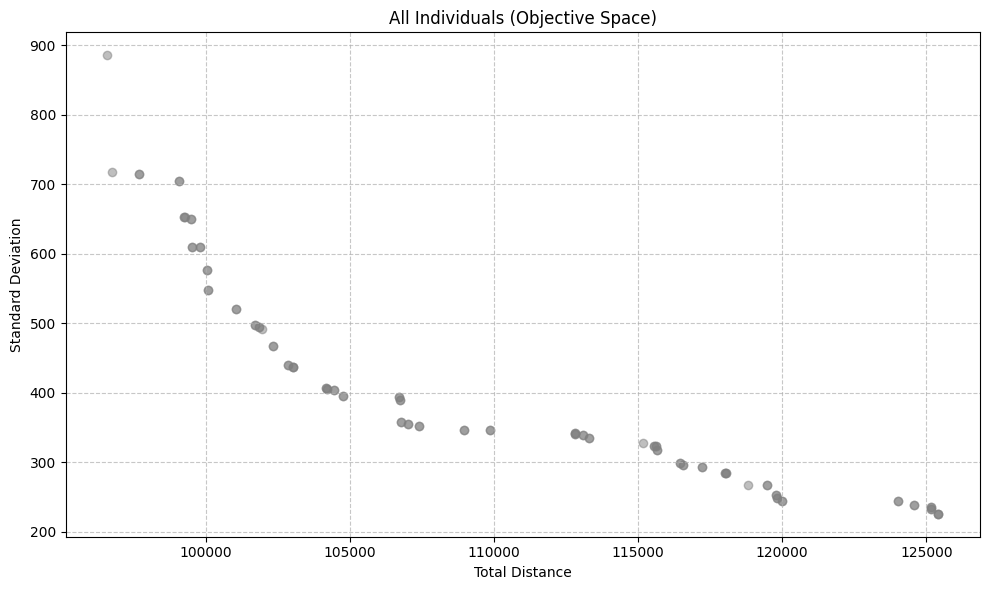

In [550]:
# All individuals scatter (objective space)
import matplotlib.pyplot as plt

all_points = np.array([p.objectives for p in final_population], dtype=float)

plt.figure(figsize=(10, 6))
plt.scatter(all_points[:, 0], all_points[:, 1], c='gray', alpha=0.5)
plt.title('All Individuals (Objective Space)')
plt.xlabel('Total Distance')
plt.ylabel('Standard Deviation')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


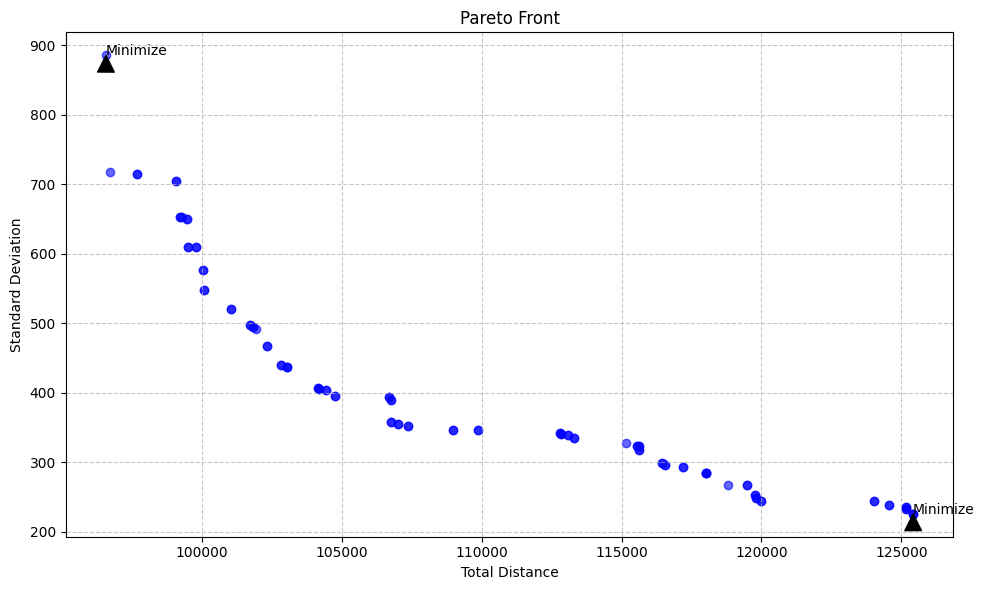

In [551]:
import matplotlib.pyplot as plt

pareto_front = [p for p in final_population if p.rank == 1]

# Assuming pareto_front is already defined
x = [solution.objectives[0] for solution in pareto_front]
y = [solution.objectives[1] for solution in pareto_front]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c='blue', alpha=0.6)
plt.title('Pareto Front')
plt.xlabel('Total Distance')
plt.ylabel('Standard Deviation')
plt.grid(True, linestyle='--', alpha=0.7)

plt.annotate('Minimize', xy=(min(x), max(y)), xytext=(min(x)-0.5, max(y)+0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Minimize', xy=(max(x), min(y)), xytext=(max(x)+0.5, min(y)-0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()